In [1]:
'''
【课程2.3】  数据归一化/标准化

 数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。
 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权
 
最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上

0-1标准化 / Z-score标准化

'''

'\n【课程2.3】  数据归一化/标准化\n\n 数据的标准化（normalization）是将数据按比例缩放，使之落入一个小的特定区间。\n 在某些比较和评价的指标处理中经常会用到，去除数据的单位限制，将其转化为无量纲的纯数值，便于不同单位或量级的指标能够进行比较和加权\n \n最典型的就是数据的归一化处理，即将数据统一映射到[0,1]区间上\n\n0-1标准化 / Z-score标准化\n\n'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# 数据标准化
# （1）0-1标准化
# 将数据的最大最小值记录下来，并通过Max-Min作为基数（即Min=0，Max=1）进行数据的归一化处理
# x = (x - Min) / (Max - Min)

df = pd.DataFrame({"value1":np.random.rand(10)*20,
                  'value2':np.random.rand(10)*100})
print(df.head())
print('------')
# 创建数据

def f(df,*cols):
    df_n = df.copy()
    for col in cols:
        ma = df_n[col].max()
        mi = df_n[col].min()
        df_n[col+'_n'] = (df_n[col]-mi)/(ma-mi)
    return(df_n)
df_n = f(df,'value1','value2')
df_n

      value1     value2
0   5.689445  26.368025
1  13.394086  63.663333
2   3.981512  82.227283
3  16.070387  62.581967
4  15.304672  16.542438
------


,value1,value2,value1_n,value2_n
0,5.689445,26.368025,0.147055,0.174848
1,13.394086,63.663333,0.780103,0.725774
2,3.981512,82.227283,0.006723,1.000000
3,16.070387,62.581967,1.000000,0.709800
4,15.304672,16.542438,0.937085,0.029705
5,11.847344,36.358419,0.653016,0.322426
6,15.183865,16.117700,0.927159,0.023430
7,14.658880,47.131964,0.884024,0.481573
8,3.899683,74.233907,0.000000,0.881922
9,9.506631,14.531557,0.460692,0.000000


In [23]:
# 数据标准化
# （2）Z-score标准化
# Z分数（z-score）,是一个分数与平均数的差再除以标准差的过程 → z=(x-μ)/σ，其中x为某一具体分数，μ为平均数，σ为标准差
# Z值的量代表着原始分数和母体平均值之间的距离，是以标准差为单位计算。在原始分数低于平均值时Z则为负数，反之则为正数
# 数学意义：一个给定分数距离平均数多少个标准差?

df = pd.DataFrame({"value1":np.random.rand(10) * 100,
                  'value2':np.random.rand(10) * 100})
print(df.head())
print('------')
# 创建数据

def f_z(df,*cols):
    df_n = df.copy()
    for col in cols:
        u  =df_n[col].mean()
        std = df_n[col].std()
        df_n[col+"_zn"] = (df_n[col] - u) / std
    return(df_n)

df_z = f_z(df,'value1','value2')
u_z = df_z['value1_zn'].mean()
std_z = df_z['value1_zn'].std()
print(df_z)
print('标准化后value1的均值为:%.2f, 标准差为：%.2f' % (u_z, std_z))
# 标准化数据
# 经过处理的数据符合标准正态分布，即均值为0，标准差为1

# 什么情况用Z-score标准化：
# 在分类、聚类算法中，需要使用距离来度量相似性的时候，Z-score表现更好

      value1     value2
0  55.274426  24.779023
1  60.746742  15.241681
2  55.891063  88.110637
3  70.962181  94.353113
4   6.625923  84.131228
------
      value1     value2  value1_zn  value2_zn
0  55.274426  24.779023  -0.015517  -0.976134
1  60.746742  15.241681   0.231957  -1.251193
2  55.891063  88.110637   0.012369   0.850365
3  70.962181  94.353113   0.693930   1.030399
4   6.625923  84.131228  -2.215548   0.735598
5  82.670401  87.940628   1.223411   0.845461
6  61.029512  93.291683   0.244745   0.999787
7  32.919829  25.008604  -1.026459  -0.969513
8  76.968159  57.234475   0.965538  -0.040111
9  53.087287  16.161692  -0.114426  -1.224660
标准化后value1的均值为:-0.00, 标准差为：1.00


,value1,value2,value1_n,value2_n,f
E,26.508872,65.078299,0.895595,0.700290,0.817473
G,18.775811,89.369635,0.598601,1.000000,0.759161
J,29.227329,32.107625,1.000000,0.293493,0.717397
F,27.550110,18.308562,0.935585,0.123238,0.610646
I,26.521883,19.715381,0.896095,0.140596,0.593895
D,24.413924,8.320194,0.815137,0.000000,0.489082
B,3.242849,78.358625,0.002045,0.864145,0.346885
A,3.189594,63.483861,0.000000,0.680617,0.272247
C,10.203712,17.089026,0.269383,0.108191,0.204906
H,7.893903,18.734291,0.180673,0.128491,0.159800


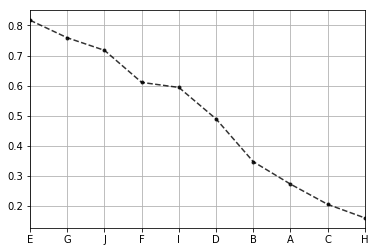

In [30]:
# 案例应用
# 八类产品的两个指标value1，value2，其中value1权重为0.6，value2权重为0.4
# 通过0-1标准化，判断哪个产品综合指标状况最好

df = pd.DataFrame({"value1":np.random.rand(10) * 30,
                  'value2':np.random.rand(10) * 100},
                 index = list('ABCDEFGHIJ'))
#print(df.head())
#print('------')
# 创建数据"

df_n1 = f(df,'value1','value2')
# 进行标准化处理
df_n1

df_n1['f'] = (df_n1['value1_n']*0.6) +(df_n1['value2_n']*0.4)
df_n1.sort_values(by = 'f',inplace=True,ascending=False)
df_n1['f'].plot(kind = 'line', style = '--.k', alpha = 0.8, grid = True)
df_n1
# 查看综合指标状况